# Relationship Between GDP and Rental Prices

## Comparisons
Looking at Virginia cities, compare Virginia rental prices averaged by year to Virginia GDP.

## Method
1. Import Rent data
1. Create Rent DataFrame
1. Create GDP DataFrame from csv data and apply inflation method
1. Add base year GDP data into the Rent DataFrame
1. Run visualizations to find any trends in the data

In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import common_functions

pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', None)

## Read in the Zillow Yearly Rental Data 

In [2]:
# load the zillow rental csv into a dataframe
richmondRent = pd.read_csv(r'../DataSet/RichmondRent.csv',header= 0,encoding = "ISO-8859-1")
vaBeachRent = pd.read_csv(r'../DataSet/VABeachRent.csv',header= 0,encoding = "ISO-8859-1")

In [3]:
richmondRent.head()

,yr,period,frequency,location_name,median_rent_price,mean_rent_price
0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017.0,1.0,year,"Richmond, VA","$1,060","$1,059"
2,2016.0,1.0,year,"Richmond, VA","$1,036","$1,050"
3,2015.0,1.0,year,"Richmond, VA","$1,048","$1,056"
4,2014.0,1.0,year,"Richmond, VA","$1,035","$1,022"


In [4]:
# delete blank first row
richmondRent.drop(richmondRent.index[0], axis = 0, inplace = True)
richmondRent.reset_index(drop = True, inplace = True)
richmondRent.head()

,yr,period,frequency,location_name,median_rent_price,mean_rent_price
0,2017.0,1.0,year,"Richmond, VA","$1,060","$1,059"
1,2016.0,1.0,year,"Richmond, VA","$1,036","$1,050"
2,2015.0,1.0,year,"Richmond, VA","$1,048","$1,056"
3,2014.0,1.0,year,"Richmond, VA","$1,035","$1,022"
4,2013.0,1.0,year,"Richmond, VA",$979,$982


In [5]:
vaBeachRent.head()

,yr,period,frequency,location_name,median_rent_price,mean_rent_price
0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017.0,1.0,year,"Virginia Beach, VA","$1,321","$1,312"
2,2016.0,1.0,year,"Virginia Beach, VA","$1,300","$1,362"
3,2015.0,1.0,year,"Virginia Beach, VA","$1,294","$1,324"
4,2014.0,1.0,year,"Virginia Beach, VA","$1,232","$1,294"


In [6]:
# delete blank first row
vaBeachRent.drop(vaBeachRent.index[0], axis = 0, inplace = True)
vaBeachRent.reset_index(drop = True, inplace = True)
vaBeachRent.head()

,yr,period,frequency,location_name,median_rent_price,mean_rent_price
0,2017.0,1.0,year,"Virginia Beach, VA","$1,321","$1,312"
1,2016.0,1.0,year,"Virginia Beach, VA","$1,300","$1,362"
2,2015.0,1.0,year,"Virginia Beach, VA","$1,294","$1,324"
3,2014.0,1.0,year,"Virginia Beach, VA","$1,232","$1,294"
4,2013.0,1.0,year,"Virginia Beach, VA","$1,240","$1,265"


In [7]:
# now to concatenate the two data frames together

vaRent = pd.concat([richmondRent, vaBeachRent], ignore_index = True)
vaRent

,yr,period,frequency,location_name,median_rent_price,mean_rent_price
0,2017.0,1.0,year,"Richmond, VA","$1,060","$1,059"
1,2016.0,1.0,year,"Richmond, VA","$1,036","$1,050"
2,2015.0,1.0,year,"Richmond, VA","$1,048","$1,056"
3,2014.0,1.0,year,"Richmond, VA","$1,035","$1,022"
4,2013.0,1.0,year,"Richmond, VA",$979,$982
5,2012.0,1.0,year,"Richmond, VA",$969,$961
6,2011.0,1.0,year,"Richmond, VA",$969,$940
7,2010.0,1.0,year,"Richmond, VA",$979,$976
8,2009.0,1.0,year,"Richmond, VA",$996,$992
9,2008.0,1.0,year,"Richmond, VA",$995,$965


In [8]:
vaRent.dtypes

yr                   float64
period               float64
frequency             object
location_name         object
median_rent_price     object
mean_rent_price       object
dtype: object

In [9]:
for i in vaRent.index:
    vaRent.loc[i, 'median_rent_price'] = float(re.sub('[\D\s+]', '', vaRent.loc[i, 'median_rent_price']))
    vaRent.loc[i, 'mean_rent_price'] = float(re.sub('[\D\s+]', '', vaRent.loc[i, 'mean_rent_price']))
vaRent

,yr,period,frequency,location_name,median_rent_price,mean_rent_price
0,2017.0,1.0,year,"Richmond, VA",1060,1059
1,2016.0,1.0,year,"Richmond, VA",1036,1050
2,2015.0,1.0,year,"Richmond, VA",1048,1056
3,2014.0,1.0,year,"Richmond, VA",1035,1022
4,2013.0,1.0,year,"Richmond, VA",979,982
5,2012.0,1.0,year,"Richmond, VA",969,961
6,2011.0,1.0,year,"Richmond, VA",969,940
7,2010.0,1.0,year,"Richmond, VA",979,976
8,2009.0,1.0,year,"Richmond, VA",996,992
9,2008.0,1.0,year,"Richmond, VA",995,965


In [10]:
vaRent.dtypes

yr                   float64
period               float64
frequency             object
location_name         object
median_rent_price     object
mean_rent_price       object
dtype: object

## Read in state GDP data

In [11]:
gdpByState = pd.read_csv(r'../DataSet/yearlyGDPbyState.csv')
gdpByState.head(5)

,Unnamed: 0,year,state,current dollars,GDP,GDP_area
0,1,1995,Alabama,2001,95514.0,Southeast
1,0,1995,Alaska,2001,24791.0,Far West
2,3,1995,Arizona,2001,104586.0,Southwest
3,2,1995,Arkansas,2001,53809.0,Southeast
4,4,1995,California,2001,925931.0,Far West


In [12]:
# drop old index column and reset index
gdpByState = gdpByState.drop('Unnamed: 0', axis = 1)

In [13]:
gdpByState.head(5)

,year,state,current dollars,GDP,GDP_area
0,1995,Alabama,2001,95514.0,Southeast
1,1995,Alaska,2001,24791.0,Far West
2,1995,Arizona,2001,104586.0,Southwest
3,1995,Arkansas,2001,53809.0,Southeast
4,1995,California,2001,925931.0,Far West


In [14]:
gdpByState.dtypes

year                 int64
state               object
current dollars      int64
GDP                float64
GDP_area            object
dtype: object

#### Now to inflate the dollars to base year 2019 dollars 

In [15]:
gdpByState = common_functions.inflation_adjust(gdpByState)

In [16]:
gdpByState.head()

,year,state,current dollars,GDP,GDP_area,inf-adjusted
0,1995,Alabama,2001,95514.0,Southeast,138331.0
1,1995,Alaska,2001,24791.0,Far West,35904.0
2,1995,Arizona,2001,104586.0,Southwest,151469.0
3,1995,Arkansas,2001,53809.0,Southeast,77930.0
4,1995,California,2001,925931.0,Far West,1341004.0


#### DataFrame with GDP  for Virginia by year from 2014 - 2019

In [17]:
gdpVA = gdpByState[(gdpByState['state'] == 'Virginia') & (gdpByState['year'] >= 2006) & (gdpByState['year'] <= 2017)]
gdpVA.reset_index(drop = True, inplace = True)
gdpVA

,year,state,current dollars,GDP,GDP_area,inf-adjusted
0,2006,Virginia,2007,368604.000000,Southeast,455334.0
1,2007,Virginia,2010,389319.000000,Southeast,457382.0
2,2008,Virginia,2010,402853.000000,Southeast,473282.0
3,2009,Virginia,2010,409732.000000,Southeast,481363.0
4,2010,Virginia,2013,421325.000000,Southeast,462631.0
5,2011,Virginia,2013,430103.000000,Southeast,472270.0
6,2012,Virginia,2013,445090.000000,Southeast,488726.0
7,2013,Virginia,2014,454984.000000,Southeast,493144.0
8,2014,Virginia,2014,463613.000000,Southeast,502497.0
9,2015,Virginia,2016,484962.333333,Southeast,518941.0


### Now to add GDP data to the various Rental DataFrames

#### stateRental DataFrame

In [18]:
# add inflation adjusted GDP for Virginia to a dictionary with years as the key
gdp_dict = {}
for i in gdpVA.index:
    gdp_dict[gdpVA.loc[i, 'year']] = gdpVA.loc[i, 'inf-adjusted']
gdp_dict

{2006: 455334.0,
 2007: 457382.0,
 2008: 473282.0,
 2009: 481363.0,
 2010: 462631.0,
 2011: 472270.0,
 2012: 488726.0,
 2013: 493144.0,
 2014: 502497.0,
 2015: 518941.0,
 2016: 528985.0,
 2017: 519705.0}

In [19]:
# add GDP to vaRent

for i in vaRent.index:
    vaRent.loc[i, 'Inf-Adj GDP'] = gdp_dict[vaRent.loc[i, 'yr']]

vaRent

,yr,period,frequency,location_name,median_rent_price,mean_rent_price,Inf-Adj GDP
0,2017.0,1.0,year,"Richmond, VA",1060,1059,519705.0
1,2016.0,1.0,year,"Richmond, VA",1036,1050,528985.0
2,2015.0,1.0,year,"Richmond, VA",1048,1056,518941.0
3,2014.0,1.0,year,"Richmond, VA",1035,1022,502497.0
4,2013.0,1.0,year,"Richmond, VA",979,982,493144.0
5,2012.0,1.0,year,"Richmond, VA",969,961,488726.0
6,2011.0,1.0,year,"Richmond, VA",969,940,472270.0
7,2010.0,1.0,year,"Richmond, VA",979,976,462631.0
8,2009.0,1.0,year,"Richmond, VA",996,992,481363.0
9,2008.0,1.0,year,"Richmond, VA",995,965,473282.0


## Data Visualizations

#### First, let's take a look at the scatter plot (no time-series) of the relationship between mean rent price and state GDP

In [20]:
richmondVA = vaRent[vaRent['location_name'] == 'Richmond, VA']
vaBeachVA = vaRent[vaRent['location_name'] == 'Virginia Beach, VA']
richmondVA.head()

,yr,period,frequency,location_name,median_rent_price,mean_rent_price,Inf-Adj GDP
0,2017.0,1.0,year,"Richmond, VA",1060,1059,519705.0
1,2016.0,1.0,year,"Richmond, VA",1036,1050,528985.0
2,2015.0,1.0,year,"Richmond, VA",1048,1056,518941.0
3,2014.0,1.0,year,"Richmond, VA",1035,1022,502497.0
4,2013.0,1.0,year,"Richmond, VA",979,982,493144.0


In [21]:
vaBeachVA.head()

,yr,period,frequency,location_name,median_rent_price,mean_rent_price,Inf-Adj GDP
12,2017.0,1.0,year,"Virginia Beach, VA",1321,1312,519705.0
13,2016.0,1.0,year,"Virginia Beach, VA",1300,1362,528985.0
14,2015.0,1.0,year,"Virginia Beach, VA",1294,1324,518941.0
15,2014.0,1.0,year,"Virginia Beach, VA",1232,1294,502497.0
16,2013.0,1.0,year,"Virginia Beach, VA",1240,1265,493144.0


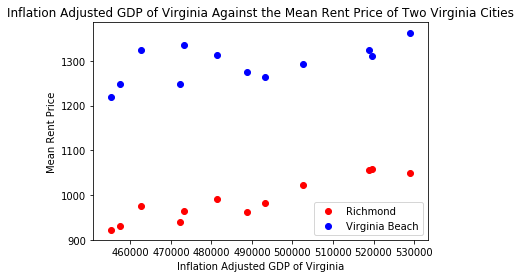

<Figure size 432x288 with 0 Axes>

In [22]:
plt.scatter(richmondVA['Inf-Adj GDP'],
            richmondVA['mean_rent_price'],
            color='red',
            label='Richmond')
plt.scatter(vaBeachVA['Inf-Adj GDP'],
            vaBeachVA['mean_rent_price'],
            color='blue',
            label='Virginia Beach')
plt.xlabel('Inflation Adjusted GDP of Virginia')
plt.ylabel('Mean Rent Price')
plt.legend()
plt.title('Inflation Adjusted GDP of Virginia Against the Mean Rent Price of Two Virginia Cities')
plt.show()
plt.savefig("GDPvsRent.jpg")

#### There is a slight positive trend between rent prices and GDP, indicating when GDP increases that rent increases as well. What is also interesting is the very clear divide in rent prices between Richmond and Virginia Beach.

#### Now let's look at the data as time series: 

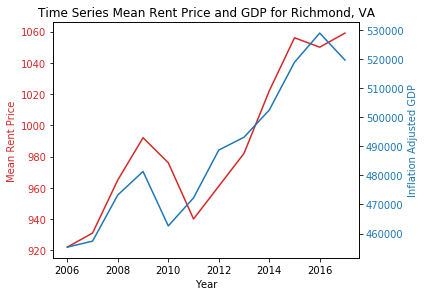

In [23]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Rent Price', color=color)
ax1.plot(richmondVA['yr'], richmondVA['mean_rent_price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
ax2.set_ylabel('Inflation Adjusted GDP', color=color2)  # we already handled the x-label with ax1
ax2.plot(richmondVA['yr'], richmondVA['Inf-Adj GDP'], color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Time Series Mean Rent Price and GDP for Richmond, VA')
plt.show()

#### Interestingly, it seems that rent increase/decrease lags behind the GDP. For example, 2010 saw a sharp decline in GDP but only a slight decline in rent. In 2011, there was a sharp decline in rent, but an increase in GDP.

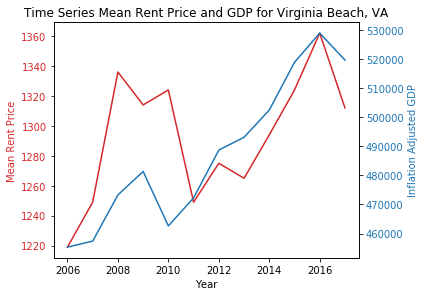

In [24]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Rent Price', color=color)
ax1.plot(vaBeachVA['yr'], vaBeachVA['mean_rent_price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
ax2.set_ylabel('Inflation Adjusted GDP', color=color2)  # we already handled the x-label with ax1
ax2.plot(vaBeachVA['yr'], vaBeachVA['Inf-Adj GDP'], color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Time Series Mean Rent Price and GDP for Virginia Beach, VA')
plt.show()

#### Although more chaotic at first glance, there still seems to be some lag in rent changes when GDP increase/decreases.